# **Análisis de datos de estudiantse**

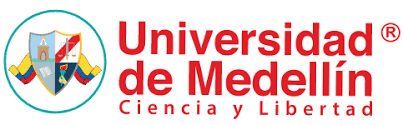

Emmanuel Vélez Meneses

# Analisis exploratorio

In [ ]:
#Cargando archivo desde el directorio de trabajo
from google.colab import files
import pandas as pd

# Cargar un archivo desde tu dispositivo local
Archivo = files.upload()

# Obtener la ruta del archivo cargado
Ruta = list(Archivo.keys())[0]

# Leer el archivo con pandas
datos = pd.read_csv(Ruta)

# Mostrar los 10 primeros registros del DataFrame
print()
datos.head(10)

Saving CASchools.csv to CASchools.csv



rownames  district                           school       county grades  \
0         1     75119               Sunol Glen Unified      Alameda  KK-08   
1         2     61499             Manzanita Elementary        Butte  KK-08   
2         3     61549      Thermalito Union Elementary        Butte  KK-08   
3         4     61457  Golden Feather Union Elementary        Butte  KK-08   
4         5     61523         Palermo Union Elementary        Butte  KK-08   
5         6     62042          Burrel Union Elementary       Fresno  KK-08   
6         7     68536            Holt Union Elementary  San Joaquin  KK-08   
7         8     63834              Vineland Elementary         Kern  KK-08   
8         9     62331         Orange Center Elementary       Fresno  KK-08   
9        10     67306      Del Paso Heights Elementary   Sacramento  KK-06   

   students    teachers   calworks       lunch  computer  expenditure  \
0       195   10.900000   0.510200    2.040800        67  6384.911133   
1       240   11.150000  15.416700   47.916698       101  5099.380859   
2      1550   82.900002  55.032299   76.322601       169  5501.954590   
3       243   14.000000  36.475399   77.049202        85  7101.831055   
4      1335   71.500000  33.108601   78.427002       171  5235.987793   
5       137    6.400000  12.318800   86.956497        25  5580.146973   
6       195   10.000000  12.903200   94.623703        28  5253.331055   
7       888   42.500000  18.806299  100.000000        66  4565.746094   
8       379   19.000000  32.189999   93.139801        35  5355.548340   
9      2247  108.000000  78.994202   87.316399         0  5036.211426   

      income    english        read        math  
0  22.690001   0.000000  691.599976  690.000000  
1   9.824000   4.583333  660.500000  661.900024  
2   8.978000  30.000002  636.299988  650.900024  
3   8.978000   0.000000  651.900024  643.500000  
4   9.080333  13.857677  641.799988  639.900024  
5  10.415000  12.408759  605.700012  605.400024  
6   6.577000  68.717949  604.500000  609.000000  
7   8.174000  46.959461  605.500000  612.500000  
8   7.385000  30.079157  608.900024  616.099976  
9  11.613333  40.275921  611.900024  613.400024

In [ ]:
#Cargar las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Graficar
%matplotlib inline
import seaborn as sns
from collections import Counter
import math
from matplotlib.patches import Ellipse
from scipy.cluster.hierarchy import linkage, leaves_list
import statsmodels.api as sm
import matplotlib.font_manager
import geopandas as gpd
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [ ]:
datos = datos.drop(columns=['rownames'])

In [ ]:
# Media
media_income = datos['income'].mean()
print("Media de los ingresos:", media_income)

# Mediana
mediana_income = datos['income'].median()
print("Mediana de los ingresos:", mediana_income)

# Moda
moda_income = datos['income'].mode()
print("Moda de los ingresos:", moda_income)


Media de los ingresos: 15.316588053249177
Mediana de los ingresos: 13.727799892425537
Moda de los ingresos: 0     7.385
1     9.630
2    10.098
3    11.116
Name: income, dtype: float64


In [ ]:

# Varianza
varianza_income = datos['income'].var()
print("Varianza de los ingresos:", varianza_income)

# Desviación estándar
desviacion_income = datos['income'].std()
print("Desviación estándar de los ingresos:", desviacion_income)

# Rango
rango_income = datos['income'].max() - datos['income'].min()
print("Rango de los ingresos:", rango_income)

# Coeficiente de asimetría (skewness)
asimetria_income = datos['income'].skew()
print("Coeficiente de asimetría de los ingresos:", asimetria_income)

# Coeficiente de curtosis (kurtosis)
kurtosis_income = datos['income'].kurt()
print("Coeficiente de curtosis de los ingresos:", kurtosis_income)


Varianza de los ingresos: 52.21348287123987
Desviación estándar de los ingresos: 7.22588976329143
Rango de los ingresos: 49.99299907684327
Coeficiente de asimetría de los ingresos: 2.2231038056139307
Coeficiente de curtosis de los ingresos: 6.624982910962661


In [ ]:
# Terciles
terciles_income = np.percentile(datos['income'], [33.33, 66.66])
print("Terciles de los ingresos:", terciles_income)

# Cuartiles
cuartiles_income = np.percentile(datos['income'], [25, 50, 75])
print("Cuartiles de los ingresos:", cuartiles_income)

# Quintiles
quintiles_income = np.percentile(datos['income'], [20, 40, 60, 80, 100])
print("Quintiles de los ingresos:", quintiles_income)


Terciles de los ingresos: [11.63661287 15.56870069]
Cuartiles de los ingresos: [10.63899994 13.72779989 17.62900066]
Quintiles de los ingresos: [10.25913334 12.51159973 14.69580002 18.62135925 55.32799911]


In [ ]:
datos.describe()

district      students     teachers    calworks       lunch  \
count    420.000000    420.000000   420.000000  420.000000  420.000000   
mean   67472.809524   2628.792857   129.067376   13.246042   44.705237   
std     3466.994655   3913.104985   187.912679   11.454821   27.123381   
min    61382.000000     81.000000     4.850000    0.000000    0.000000   
25%    64307.750000    379.000000    19.662499    4.395375   23.282200   
50%    67760.500000    950.500000    48.564999   10.520450   41.750700   
75%    70419.000000   3008.000000   146.350002   18.981350   66.864725   
max    75440.000000  27176.000000  1429.000000   78.994202  100.000000   

          computer  expenditure      income     english        read  \
count   420.000000   420.000000  420.000000  420.000000  420.000000   
mean    303.383333  5312.407541   15.316588   15.768155  654.970477   
std     441.341298   633.937053    7.225890   18.285927   20.107980   
min       0.000000  3926.069580    5.335000    0.000000  604.500000   
25%      46.000000  4906.180054   10.639000    1.940807  640.400024   
50%     117.500000  5214.516602   13.727800    8.777634  655.750000   
75%     375.250000  5601.401367   17.629001   22.970003  668.725006   
max    3324.000000  7711.506836   55.327999   85.539719  704.000000   

             math  
count  420.000000  
mean   653.342619  
std     18.754202  
min    605.400024  
25%    639.375015  
50%    652.449982  
75%    665.849991  
max    709.500000

In [ ]:
def tabla_frecuencia(datos, col):
    columna = col
    n = len(columna)
    k = math.ceil(1 + math.log2(n))
    min_val, max_val = min(columna), max(columna)
    rango = max_val - min_val
    amplitud = rango / k


    bins = np.linspace(min_val, max_val, k + 1)


    frecuencias, _ = np.histogram(columna, bins)


    frec_acumulada = np.cumsum(frecuencias)


    frec_relativa = frecuencias / n


    frec_rel_acumulada = np.cumsum(frec_relativa)

    tabla = pd.DataFrame({
        'Intervalo': [f'[{bins[i]:.2f}, {bins[i+1]:.2f})' for i in range(len(bins)-1)],
        'Frecuencia': frecuencias,
        'Frec. Acumulada': frec_acumulada,
        'Frec. Relativa': frec_relativa,
        'Frec. Rel. Acumulada': frec_rel_acumulada
    })

    return tabla


resultado = tabla_frecuencia(datos, datos['income'])
resultado


Intervalo  Frecuencia  Frec. Acumulada  Frec. Relativa  \
0   [5.34, 10.33)          90               90        0.214286   
1  [10.33, 15.33)         179              269        0.426190   
2  [15.33, 20.33)          86              355        0.204762   
3  [20.33, 25.33)          36              391        0.085714   
4  [25.33, 30.33)           7              398        0.016667   
5  [30.33, 35.33)           6              404        0.014286   
6  [35.33, 40.33)           8              412        0.019048   
7  [40.33, 45.33)           5              417        0.011905   
8  [45.33, 50.33)           1              418        0.002381   
9  [50.33, 55.33)           2              420        0.004762   

   Frec. Rel. Acumulada  
0              0.214286  
1              0.640476  
2              0.845238  
3              0.930952  
4              0.947619  
5              0.961905  
6              0.980952  
7              0.992857  
8              0.995238  
9              1.000000

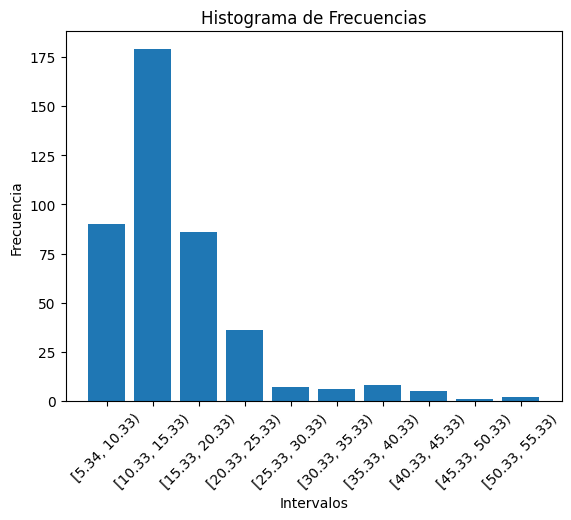

In [ ]:
#El histograma de frecuencias
plt.bar(resultado['Intervalo'], resultado['Frecuencia'], align='center')
plt.xticks(rotation=45)
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias')
plt.show()

<ipython-input-14-df7f3716818d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datos['income'], shade=True)


<Axes: xlabel='income', ylabel='Density'>

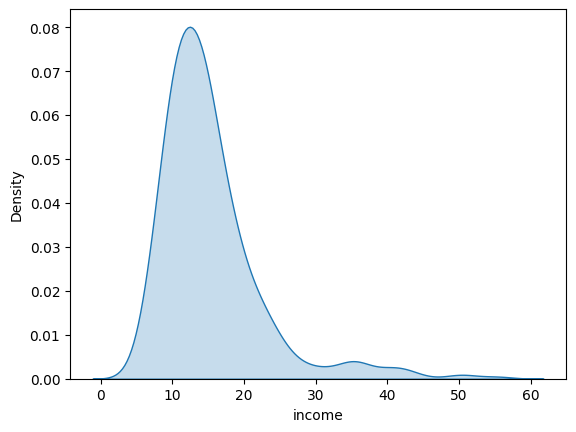

In [ ]:
#Gráfico de densidad
sns.kdeplot(datos['income'], shade=True)

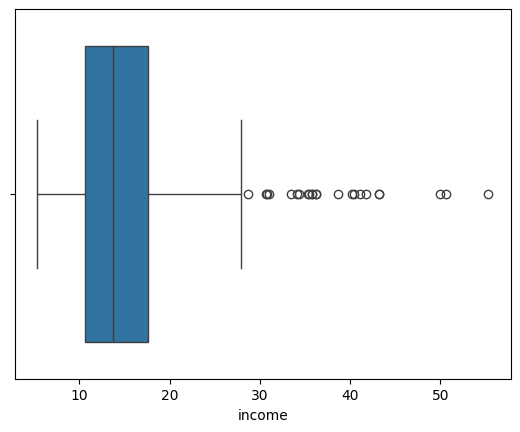

In [ ]:
#El gráfico de caja y bigotes
sns.boxplot(datos['income'], orient="h")
plt.show()


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   district     420 non-null    int64  
 1   school       420 non-null    object 
 2   county       420 non-null    object 
 3   grades       420 non-null    object 
 4   students     420 non-null    int64  
 5   teachers     420 non-null    float64
 6   calworks     420 non-null    float64
 7   lunch        420 non-null    float64
 8   computer     420 non-null    int64  
 9   expenditure  420 non-null    float64
 10  income       420 non-null    float64
 11  english      420 non-null    float64
 12  read         420 non-null    float64
 13  math         420 non-null    float64
dtypes: float64(8), int64(3), object(3)
memory usage: 46.1+ KB


In [ ]:
#Separar las variables continuas de las demás
continuas = datos.select_dtypes(include=[float, int])


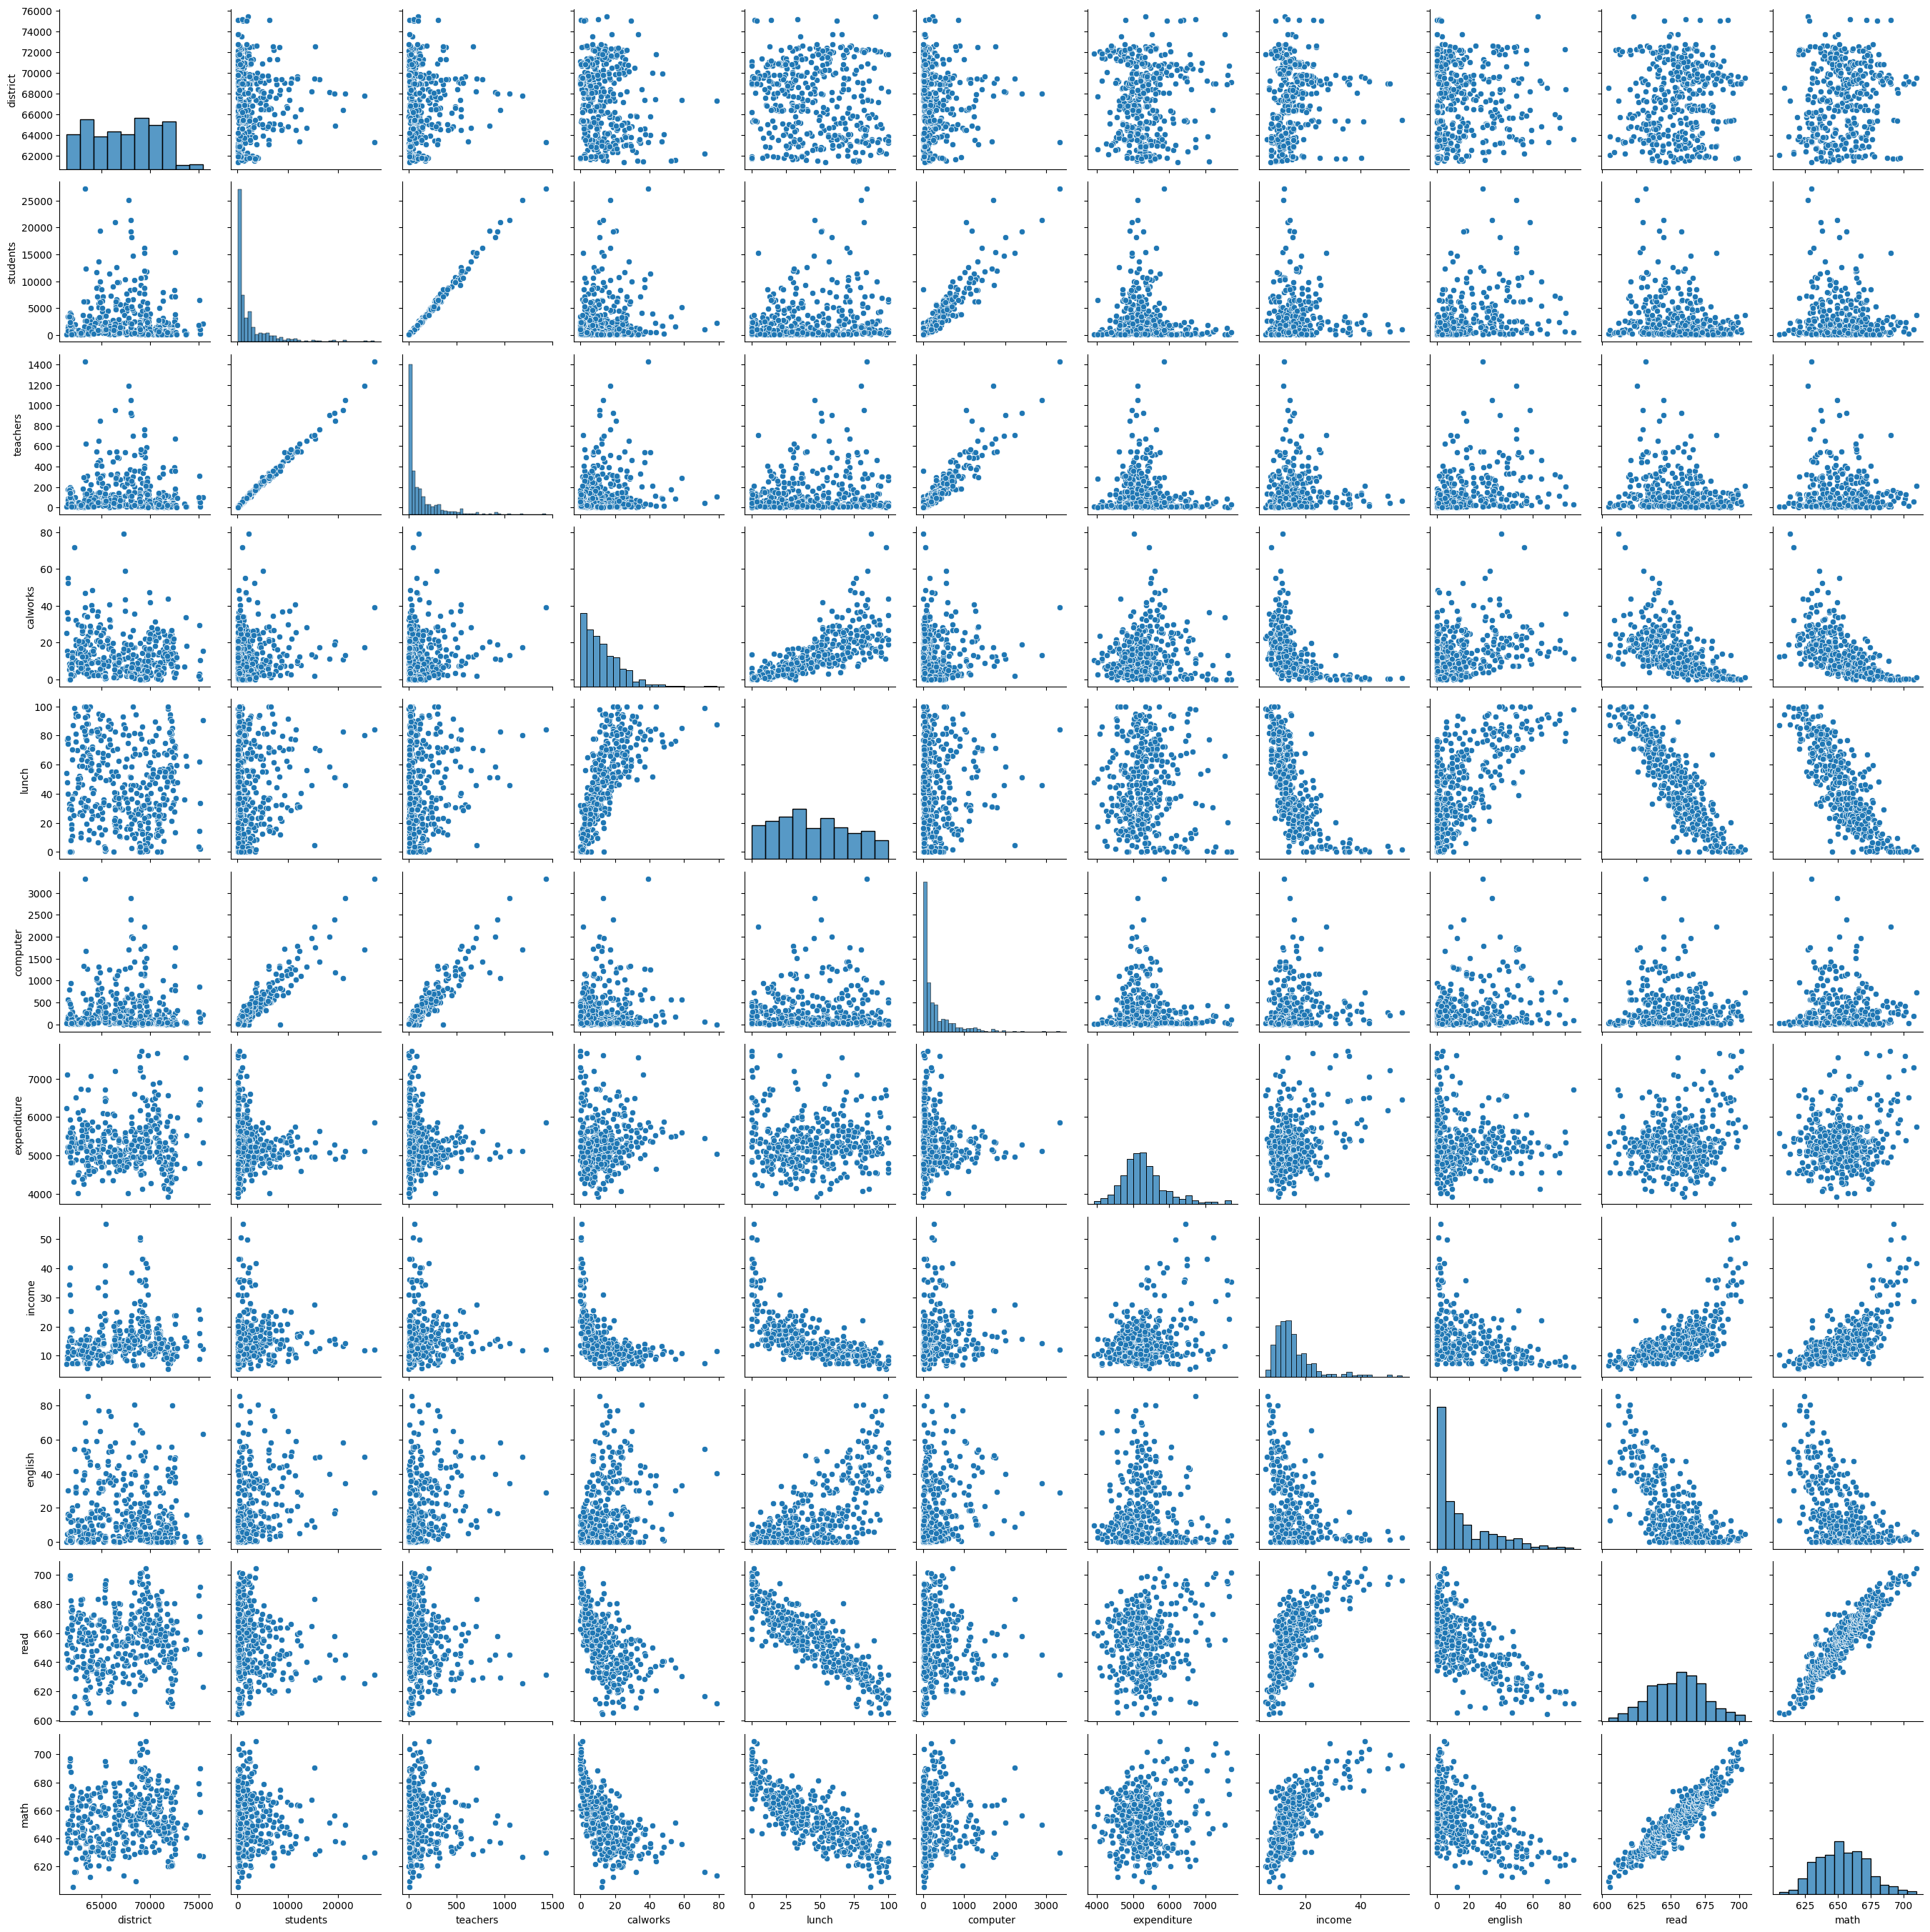

In [ ]:
#Gráfico exploratorio por pares de variables
sns.pairplot(continuas)

<Axes: >

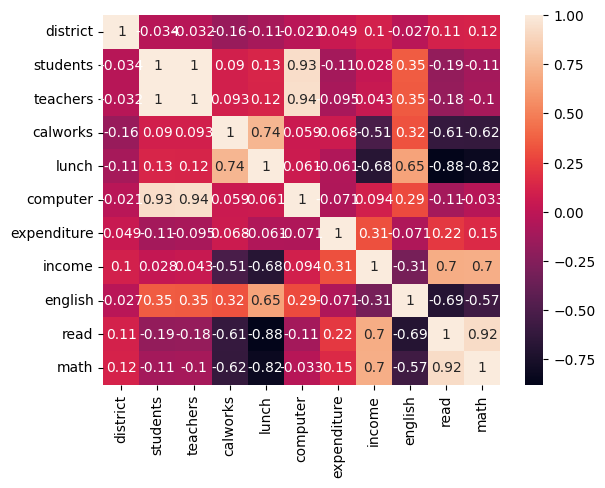

In [ ]:
#La matriz de correlaciones
correlation_matrix=continuas.corr()
continuas.corr()
sns.heatmap(correlation_matrix, annot=True)



<Axes: >

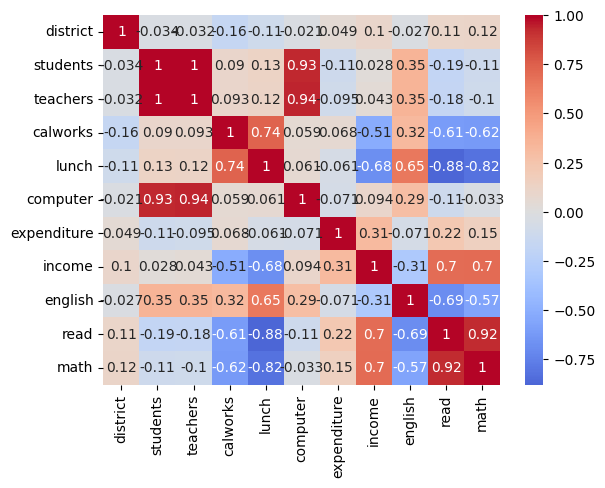

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)


# **Análisis de componentes principales PCA**

In [ ]:
scaler = StandardScaler()
continuas_scaled = scaler.fit_transform(continuas)
pca = PCA()
res_pca = pca.fit(continuas_scaled)

np.set_printoptions(suppress=True)

print("Valores propios (Varianza explicada por cada componente):")
print(np.round(res_pca.explained_variance_, 2))

print("\nProporción de varianza explicada:")
print(np.round(res_pca.explained_variance_ratio_, 2))

print("\nCargas de los componentes (loadings):")
print(np.round(res_pca.components_, 2))

Valores propios (Varianza explicada por cada componente):
[4.53 2.88 1.11 1.01 0.65 0.35 0.25 0.11 0.08 0.05 0.  ]

Proporción de varianza explicada:
[0.41 0.26 0.1  0.09 0.06 0.03 0.02 0.01 0.01 0.   0.  ]

Cargas de los componentes (loadings):
[[ 0.07 -0.19 -0.19 -0.33 -0.43 -0.15  0.1   0.33 -0.35  0.44  0.42]
 [ 0.02  0.53  0.53 -0.14 -0.15  0.54 -0.02  0.23  0.08  0.12  0.16]
 [ 0.09 -0.02  0.    0.29  0.14  0.01  0.89  0.27  0.12  0.03  0.  ]
 [ 0.96 -0.02 -0.02 -0.17  0.03 -0.03 -0.06 -0.01  0.19 -0.08 -0.04]
 [-0.25 -0.1  -0.1  -0.52  0.   -0.13  0.01  0.32  0.71 -0.14 -0.03]
 [ 0.05 -0.08 -0.07  0.6   0.11 -0.04 -0.42  0.58  0.2   0.08  0.22]
 [-0.02 -0.01 -0.02  0.09  0.16  0.01  0.04 -0.54  0.4   0.33  0.64]
 [-0.01  0.02  0.02 -0.33  0.81  0.02 -0.03  0.2  -0.34 -0.1   0.27]
 [-0.   -0.44 -0.37 -0.02 -0.01  0.82 -0.01 -0.01  0.01 -0.07 -0.  ]
 [ 0.   -0.02 -0.01 -0.06  0.28  0.05 -0.07  0.01  0.09  0.8  -0.52]
 [-0.   -0.69  0.73 -0.01 -0.   -0.04 -0.01 -0.01 -0.   -0.    0

In [ ]:
#Una mejor visualización de los resultados
cumVar = pd.DataFrame(np.cumsum(res_pca.explained_variance_ratio_)*100,
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(res_pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2", 2: "PC3", 3: "PC4", 4: "PC5", 5: "PC6", 6: "PC7", 7: "PC8", 8: "PC9", 9: "PC10"})


VarPerc  cumVarPerc
PC1   41.079899   41.079899
PC2   26.099051   67.178950
PC3   10.100856   77.279805
PC4    9.129720   86.409526
PC5    5.884992   92.294517
PC6    3.213759   95.508276
PC7    2.229403   97.737679
PC8    1.007819   98.745498
PC9    0.762609   99.508106
PC10   0.469806   99.977912
10     0.022088  100.000000

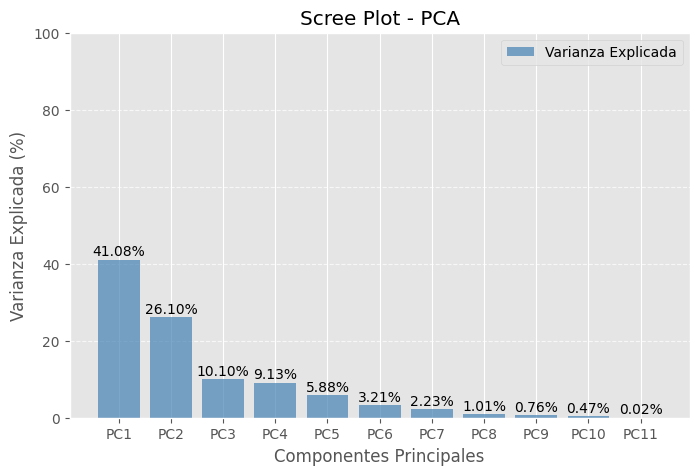

In [ ]:
#Visualización del PCA
plt.figure(figsize=(8,5))
plt.bar(range(1, len(res_pca.explained_variance_ratio_)+1),
        res_pca.explained_variance_ratio_*100,
        alpha=0.7, color="steelblue", label="Varianza Explicada")

for i, var in enumerate(res_pca.explained_variance_ratio_*100):
    plt.text(i+1, var+1, f"{var:.2f}%", ha='center', fontsize=10)

plt.xlabel("Componentes Principales")
plt.ylabel("Varianza Explicada (%)")
plt.title("Scree Plot - PCA")
plt.ylim(0, 100)
plt.xticks(range(1, len(res_pca.explained_variance_ratio_)+1),
           [f"PC{i+1}" for i in range(len(res_pca.explained_variance_ratio_))])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.41079899 0.26099051 0.10100856 0.0912972  0.05884992 0.03213759
 0.02229403 0.01007819 0.00762609 0.00469806 0.00022088]


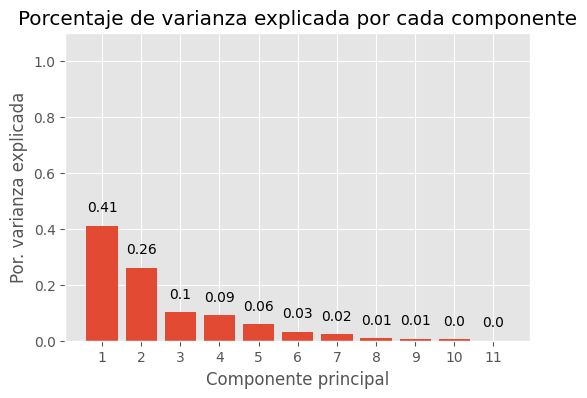

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(res_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(res_pca.n_components_) + 1,
    height = res_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, res_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(res_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

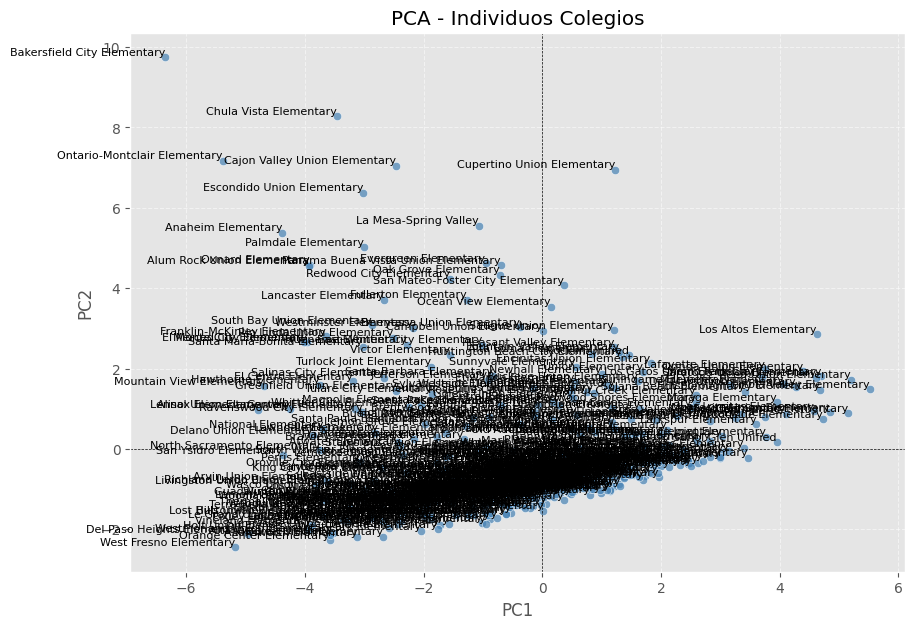

In [ ]:
#El gráfico Biplot
paises = datos.iloc[:, 1]
plt.figure(figsize=(10, 7))
df_pca_scores = pd.DataFrame(res_pca.transform(continuas_scaled), columns=[f"PC{i+1}" for i in range(res_pca.n_components_)])
sns.scatterplot(x=df_pca_scores["PC1"], y=df_pca_scores["PC2"], color="steelblue", alpha=0.7)

# Etiquetas con los nombres de los países
for i, pais in enumerate(paises):
    plt.text(df_pca_scores["PC1"][i], df_pca_scores["PC2"][i], pais, fontsize=8, ha='right', va='bottom')

# Configuración del gráfico
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Individuos Colegios")
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()

In [ ]:
#Guardar los scores (PCA)

pred = res_pca.transform(continuas_scaled)
df_pred = pd.DataFrame(pred, columns=[f"PC{i+1}" for i in range(pred.shape[1])])
df_pred.to_csv("componentes.csv", sep=';', index=False)

# Mostrar las primeras filas del DataFrame
print(df_pred.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.946819  0.173113  1.386537  1.799371 -0.375377 -0.329741  0.636981   
1  0.296448 -1.104398 -0.637803 -1.771379 -0.217592 -0.149954  0.617425   
2 -2.693041 -1.442163  1.188221 -1.992237 -0.976770  1.710234  0.972846   
3 -1.011048 -1.838280  2.804522 -2.228544 -1.264955 -0.636687  0.277015   
4 -1.922516 -1.372608  0.168922 -1.806198 -0.607618  0.469823  0.146281   

        PC8       PC9      PC10      PC11  
0 -0.192386 -0.062246 -0.127408 -0.022787  
1  0.195521  0.115548 -0.046056 -0.008387  
2 -0.620507 -0.041514 -0.530163  0.007273  
3  0.203397  0.041479  0.052862 -0.032496  
4  0.194734  0.028523  0.071930  0.014097  


In [ ]:
#Añado las columnas PC1, PC2, PC3 y PC4 al daraframe original ya que suman más de 80%

datos[['PC1', 'PC2', 'PC3', 'PC4']] = df_pred[['PC1', 'PC2', 'PC3', 'PC4']]
datos.head()

district                           school   county grades  students  \
0     75119               Sunol Glen Unified  Alameda  KK-08       195   
1     61499             Manzanita Elementary    Butte  KK-08       240   
2     61549      Thermalito Union Elementary    Butte  KK-08      1550   
3     61457  Golden Feather Union Elementary    Butte  KK-08       243   
4     61523         Palermo Union Elementary    Butte  KK-08      1335   

    teachers   calworks      lunch  computer  expenditure     income  \
0  10.900000   0.510200   2.040800        67  6384.911133  22.690001   
1  11.150000  15.416700  47.916698       101  5099.380859   9.824000   
2  82.900002  55.032299  76.322601       169  5501.954590   8.978000   
3  14.000000  36.475399  77.049202        85  7101.831055   8.978000   
4  71.500000  33.108601  78.427002       171  5235.987793   9.080333   

     english        read        math       PC1       PC2       PC3       PC4  
0   0.000000  691.599976  690.000000  3.946819  0.173113  1.386537  1.799371  
1   4.583333  660.500000  661.900024  0.296448 -1.104398 -0.637803 -1.771379  
2  30.000002  636.299988  650.900024 -2.693041 -1.442163  1.188221 -1.992237  
3   0.000000  651.900024  643.500000 -1.011048 -1.838280  2.804522 -2.228544  
4  13.857677  641.799988  639.900024 -1.922516 -1.372608  0.168922 -1.806198

# **3. Análisis de cluster**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import fcluster


**3.1 CLUSTER con todos los datos**

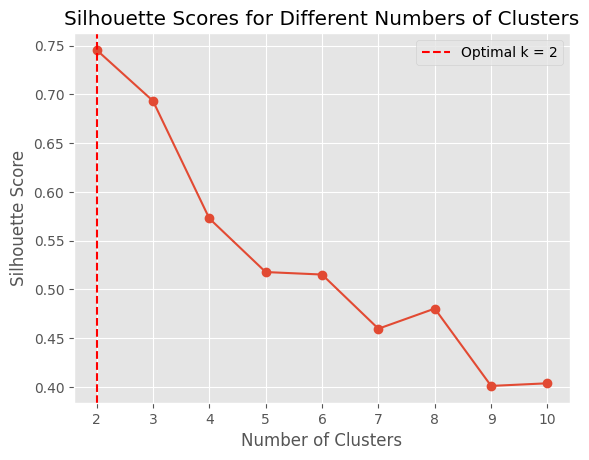

In [ ]:
#Coeficiente de Silhoutte para el número de grupos
data=datos[['students', 'teachers', 'calworks', 'lunch', 'computer', 'expenditure', 'income', 'english', 'read', 'math']]

def fviz_nbclust(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    # Find the optimal number of clusters (k)
    optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because the range starts from 2

    # Add a vertical line at the optimal k
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.legend()

    plt.show()

# Call the function with the desired maximum number of clusters
fviz_nbclust(data, max_k=10)

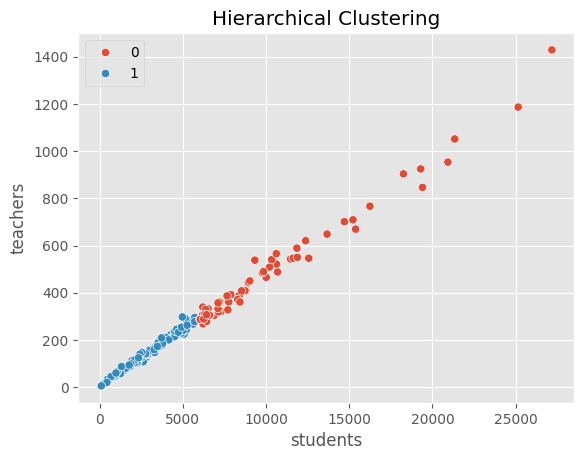

school  Cluster
0                 Sunol Glen Unified        1
1               Manzanita Elementary        1
2        Thermalito Union Elementary        1
3    Golden Feather Union Elementary        1
4           Palermo Union Elementary        1
..                               ...      ...
415           Las Lomitas Elementary        1
416             Los Altos Elementary        1
417           Somis Union Elementary        1
418                Plumas Elementary        1
419             Wheatland Elementary        1

[420 rows x 2 columns]

In [ ]:
colegios = datos['school']

model = AgglomerativeClustering(n_clusters=2)
model.fit(data)
labels = model.labels_
cluster_df = pd.DataFrame({'school': colegios, 'Cluster': labels})

# Visualizar el clustering
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=model.labels_)
plt.title('Hierarchical Clustering')
plt.show()

# Mostrar el DataFrame con los grupos asignados
cluster_df


El dendograma con el numero óptimo de clusters

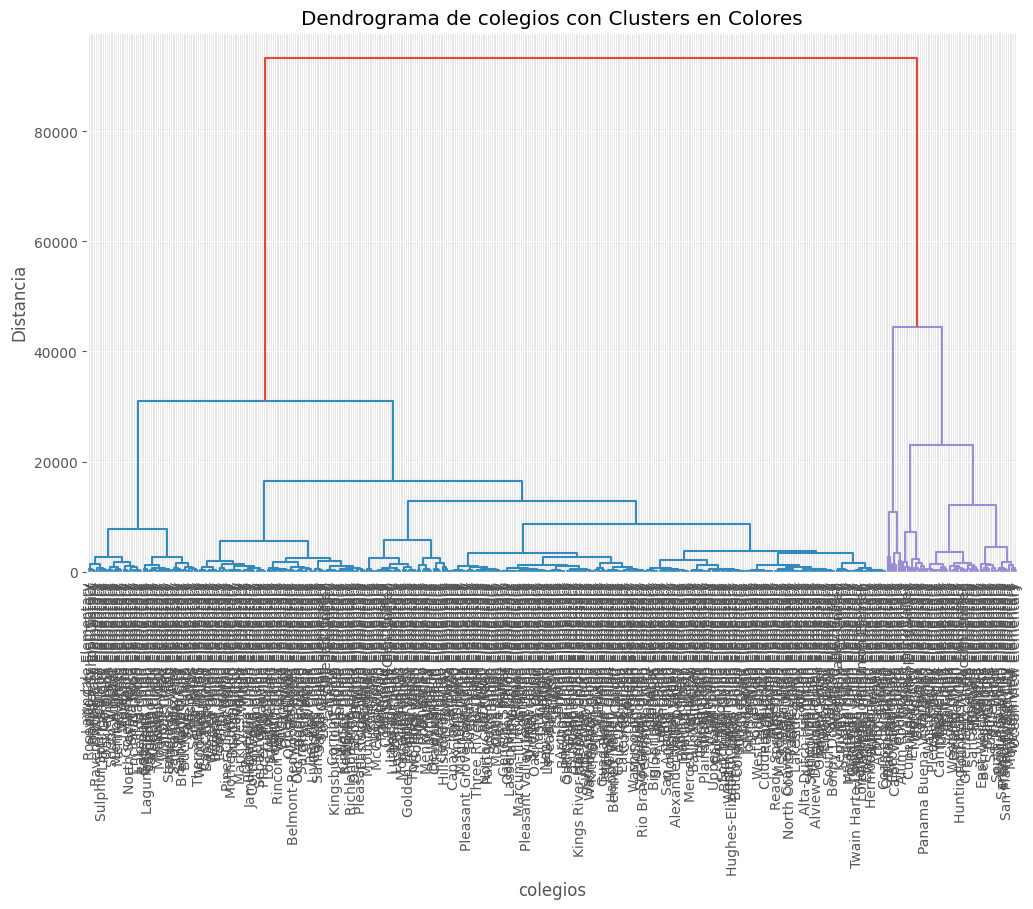

In [ ]:
model = sch.linkage(data, method='ward')

threshold = 0.7 * max(model[:, 2])  # Se basa en la distancia máxima para cortar


# Graficar el dendrograma con etiquetas de países y colores para los clusters
plt.figure(figsize=(12, 7))
sch.dendrogram(
    model,
    labels=colegios.values, # Access the underlying NumPy array using .values
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=threshold  # Define el punto de corte para los colores
)

plt.title('Dendrograma de colegios con Clusters en Colores')
plt.xlabel('colegios')
plt.ylabel('Distancia')
plt.show()

In [ ]:
# Obtener las etiquetas del cluster
cluster_df.to_csv('cluster_puras2.csv', index=False)

#Guardar el .csv
cluster_df.to_csv('cluster_puras2.csv', index=False)

# Display the DataFrame
cluster_df


school  Cluster
0                 Sunol Glen Unified        1
1               Manzanita Elementary        1
2        Thermalito Union Elementary        1
3    Golden Feather Union Elementary        1
4           Palermo Union Elementary        1
..                               ...      ...
415           Las Lomitas Elementary        1
416             Los Altos Elementary        1
417           Somis Union Elementary        1
418                Plumas Elementary        1
419             Wheatland Elementary        1

[420 rows x 2 columns]

**3.2 CINCO CLUSTER**

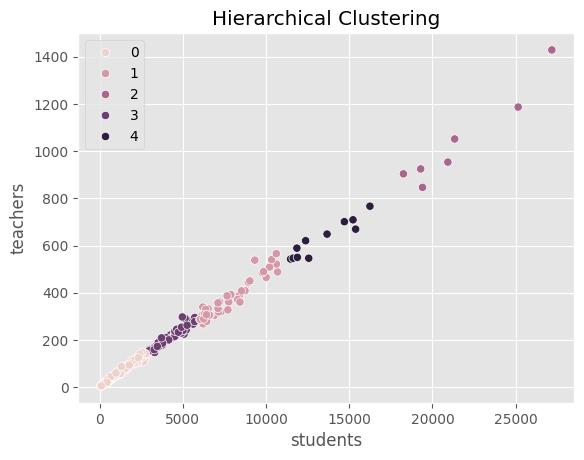

In [ ]:
#El cálculo del cluster N=5 GRUPOS
model = AgglomerativeClustering(n_clusters=5)
model.fit(data)
labels = model.labels_
cluster_df = pd.DataFrame({'Colegio': colegios, 'Cluster': labels})
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=model.labels_)
plt.title('Hierarchical Clustering')
plt.show()

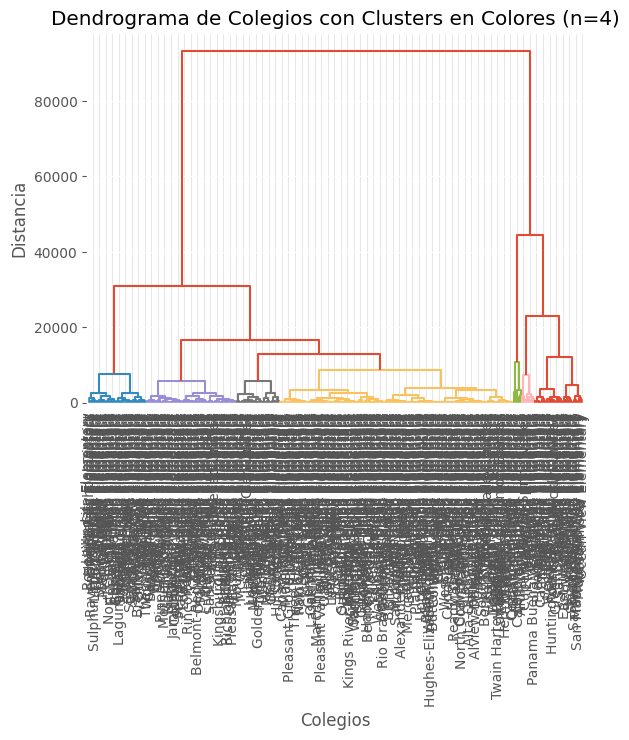

In [ ]:
#Dendograma para 5 grupos

# Generar la matriz de enlaces con el método de Ward
model_linkage = sch.linkage(data, method='ward')

# Obtener etiquetas exactas de 5 clusters
cluster_labels = fcluster(model_linkage, t=5, criterion='maxclust')

# Asegurar que el umbral de corte refleje 5 clusters
distances = model_linkage[:, 2]
distances_sorted = np.sort(distances)
color_threshold = distances_sorted[-6]  # Ajuste preciso para 5 clusters

# Verificar si hay menos de 5 colores y ajustar si es necesario
dn = dendrogram(
    model_linkage,
    labels=paises,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=color_threshold
)

# Obtener los colores usados en el dendrograma
colors_used = set(dn['leaves_color_list'])

# Si hay menos de 5 colores, ajustar el umbral y volver a dibujar
if len(colors_used) < 5:
    plt.close()  # Cerrar el primer gráfico antes de generar el nuevo
    color_threshold = distances_sorted[-7]  # Reducimos el umbral para forzar más colores

    # Graficar el dendrograma corregido
    plt.figure(figsize=(14, 10))
    dendrogram(
       model_linkage,
       labels=paises,
       leaf_rotation=90,
       leaf_font_size=10,
       color_threshold=color_threshold
    )

plt.title('Dendrograma de Colegios con Clusters en Colores (n=4)')
plt.xlabel('Colegios')
plt.ylabel('Distancia')
plt.show()



In [ ]:
# Obtener las etiquetas del cluster
cluster_df.to_csv('cluster_puras5.csv', index=False)

#Guardar el .csv
cluster_df.to_csv('cluster_puras5.csv', index=False)

# Display the DataFrame
cluster_df

Colegio  Cluster
0                 Sunol Glen Unified        0
1               Manzanita Elementary        0
2        Thermalito Union Elementary        0
3    Golden Feather Union Elementary        0
4           Palermo Union Elementary        0
..                               ...      ...
415           Las Lomitas Elementary        0
416             Los Altos Elementary        3
417           Somis Union Elementary        0
418                Plumas Elementary        0
419             Wheatland Elementary        0

[420 rows x 2 columns]

**3.3 EJERCICIO: CLUSTER con todos los COMPONENTES**

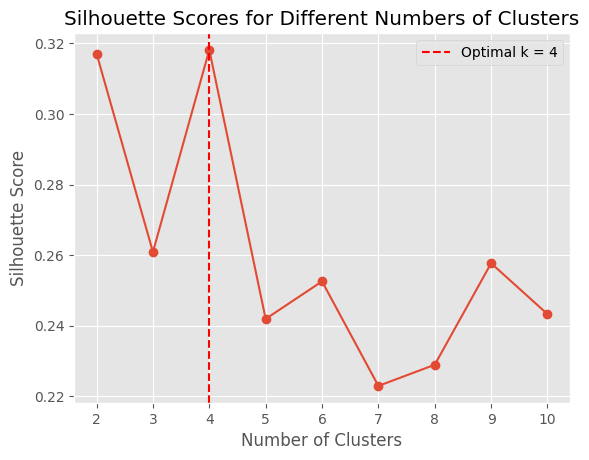

In [ ]:
dataPC=datos[["PC1", "PC2", "PC3", "PC4"]]
fviz_nbclust(dataPC, max_k=10)

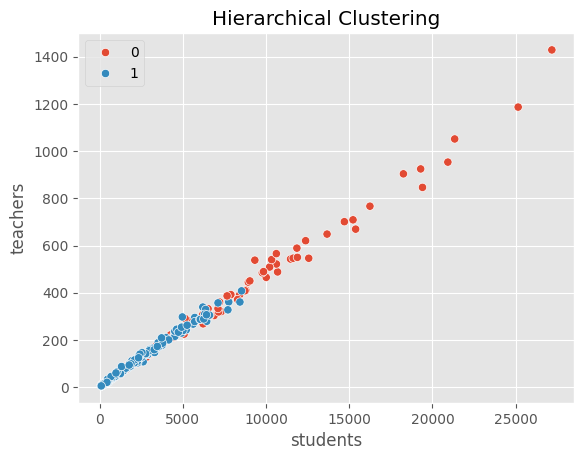

In [ ]:
#El cálculo del cluster N=2 GRUPOS
model = AgglomerativeClustering(n_clusters=2)
model.fit(dataPC)
labels = model.labels_
cluster_df = pd.DataFrame({'País': paises, 'Cluster': labels})
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=model.labels_)
plt.title('Hierarchical Clustering')
plt.show()


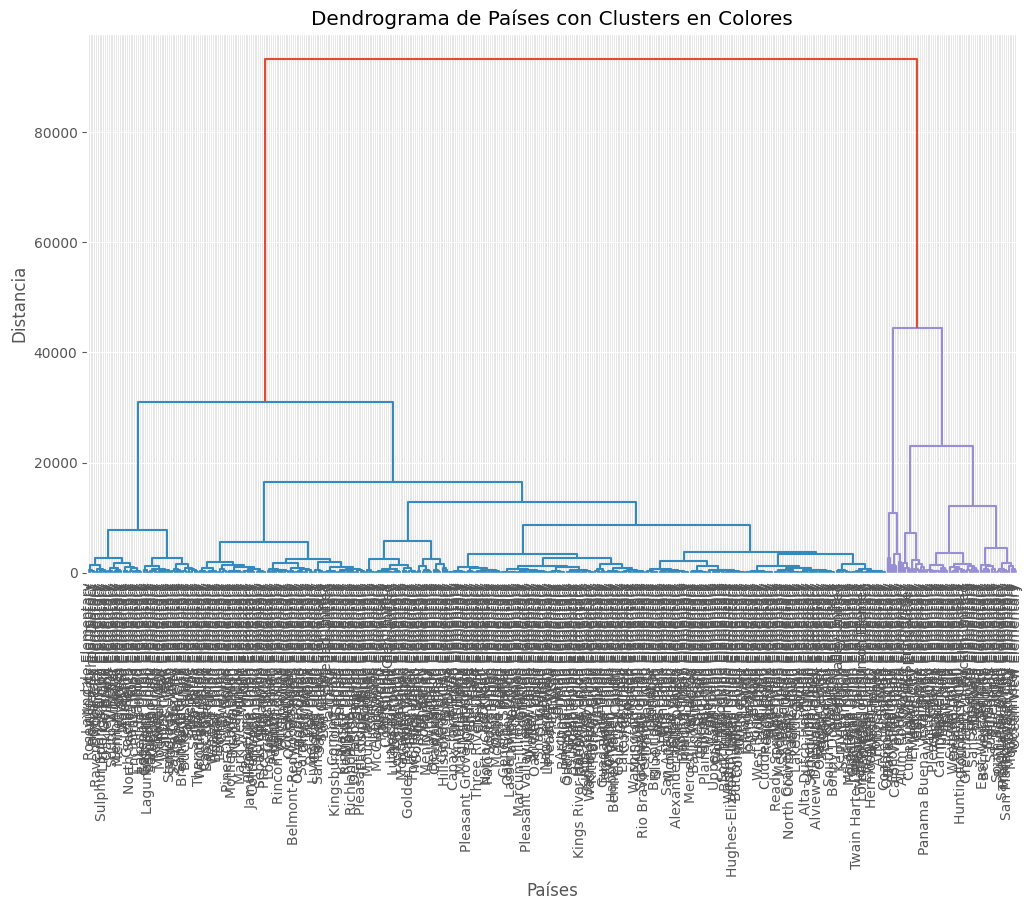

In [ ]:
#El dendograma
paises = datos.iloc[:, 1].values
model = sch.linkage(data, method='ward')

threshold = 0.7 * max(model[:, 2])  # Se basa en la distancia máxima para cortar


# Graficar el dendrograma con etiquetas de países y colores para los clusters
plt.figure(figsize=(12, 7))
sch.dendrogram(
    model,
    labels=paises,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=threshold  # Define el punto de corte para los colores
)

plt.title('Dendrograma de Países con Clusters en Colores')
plt.xlabel('Países')
plt.ylabel('Distancia')
plt.show()

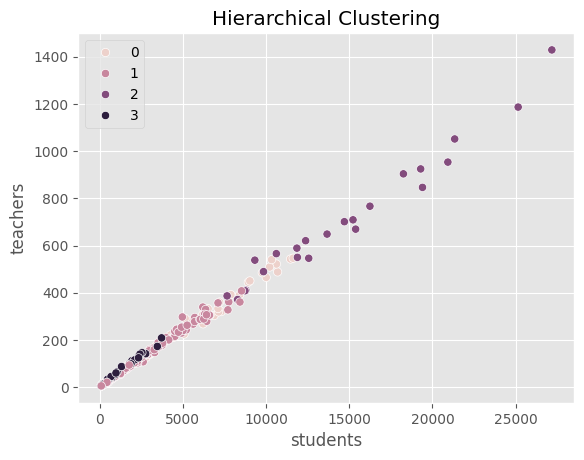

In [ ]:
#El cálculo del cluster N=5 GRUPOS
model = AgglomerativeClustering(n_clusters=4)
model.fit(dataPC)
labels = model.labels_
cluster_df = pd.DataFrame({'País': paises, 'Cluster': labels})
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=model.labels_)
plt.title('Hierarchical Clustering')
plt.show()

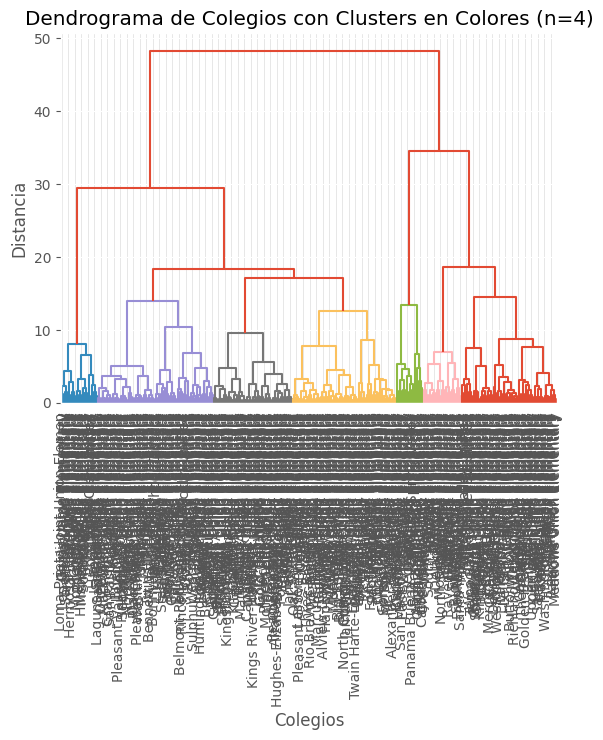

In [ ]:
#Dendograma para 5 grupos

# Generar la matriz de enlaces con el método de Ward
model_linkage = sch.linkage(dataPC, method='ward')

# Obtener etiquetas exactas de 5 clusters
cluster_labels = fcluster(model_linkage, t=5, criterion='maxclust')

# Asegurar que el umbral de corte refleje 5 clusters
distances = model_linkage[:, 2]
distances_sorted = np.sort(distances)
color_threshold = distances_sorted[-6]  # Ajuste preciso para 5 clusters

# Verificar si hay menos de 5 colores y ajustar si es necesario
dn = dendrogram(
    model_linkage,
    labels=paises,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=color_threshold
)

# Obtener los colores usados en el dendrograma
colors_used = set(dn['leaves_color_list'])

# Si hay menos de 5 colores, ajustar el umbral y volver a dibujar
if len(colors_used) < 5:
    plt.close()  # Cerrar el primer gráfico antes de generar el nuevo
    color_threshold = distances_sorted[-7]  # Reducimos el umbral para forzar más colores

    # Graficar el dendrograma corregido
    plt.figure(figsize=(14, 10))
    dendrogram(
       model_linkage,
       labels=paises,
       leaf_rotation=90,
       leaf_font_size=10,
       color_threshold=color_threshold
    )

plt.title('Dendrograma de Colegios con Clusters en Colores (n=4)')
plt.xlabel('Colegios')
plt.ylabel('Distancia')
plt.show()




In [ ]:
# Obtener las etiquetas del cluster
cluster_df.to_csv('cluster_puras5.csv', index=False)

#Guardar el .csv
cluster_df.to_csv('cluster_puras5.csv', index=False)

# Display the DataFrame
cluster_df

País  Cluster
0                 Sunol Glen Unified        3
1               Manzanita Elementary        1
2        Thermalito Union Elementary        0
3    Golden Feather Union Elementary        0
4           Palermo Union Elementary        0
..                               ...      ...
415           Las Lomitas Elementary        3
416             Los Altos Elementary        3
417           Somis Union Elementary        1
418                Plumas Elementary        1
419             Wheatland Elementary        1

[420 rows x 2 columns]